<a href="https://colab.research.google.com/github/Ashahroz/k201220ThesisCode/blob/main/ADFA_5_folds_Thesis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, TimeDistributed
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
#from pycm import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import csv

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/ADFA_LD_BINARY.csv')


In [ ]:
print(data.columns)


Index(['('142', '119')', '('43', '43')', '('340', '168')', '('265', '142')',
       '('104', '175')', '('33', '195')', '('175', '142')', '('78', '78')',
       '('168', '340')', '('4', '142')',
       ...
       '('175', '146')', '('175', '265')', '('265', '240')', '('1', '1')',
       '('125', '78')', '('78', '13')', '('85', '102')', '('27', '102')',
       '('162', '114')', 'class'],
      dtype='object', length=275)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
X = data.drop('class', axis=1)  # Features
y = data['class']  # Labels


# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Split the encoded data into training and testing sets
X_train_enc, X_test_enc, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)



In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score

# Create the Ridge Classifier model
ridge_clf = RidgeClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(ridge_clf, X_train_enc, y_train, cv=5)

# Fit the model on the entire training data
ridge_clf.fit(X_train_enc, y_train)

# Make predictions on the test set
predictions = ridge_clf.predict(X_test_enc)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of Ridge Classifier with encoded data: {accuracy}")

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean()}")


Accuracy of Ridge Classifier with encoded data: 0.8983620327593448
Cross-validation scores: [0.92857143 0.91036415 0.92577031 0.93277311 0.91596639]
Mean cross-validation score: 0.9226890756302522


Accuracy: 0.8984
Precision: 0.8885
Recall: 0.8984
F1 Score: 0.8844


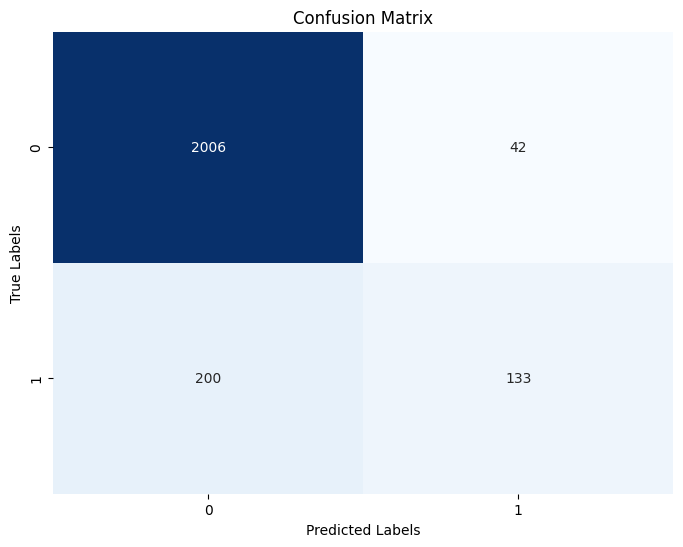

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy (Logistic Regression): 0.9324
Precision (Logistic Regression): 0.9313
Recall (Logistic Regression): 0.9324
F1 Score (Logistic Regression): 0.9318


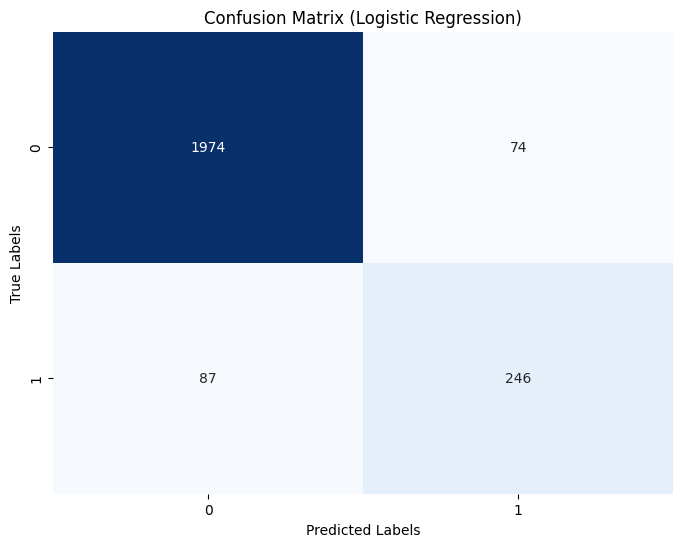

Cross-validation scores: [0.96638655 0.94397759 0.95098039 0.95518207 0.95518207]
Mean cross-validation score: 0.9543417366946778


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the Logistic Regression model
logistic_reg = LogisticRegression(max_iter=1000)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(logistic_reg, X_train_enc, y_train, cv=5, scoring='accuracy')

# Fit the model on the entire training data
logistic_reg.fit(X_train_enc, y_train)

# Make predictions on the test set
logistic_predictions = logistic_reg.predict(X_test_enc)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, logistic_predictions)
precision_logistic = precision_score(y_test, logistic_predictions, average='weighted')
recall_logistic = recall_score(y_test, logistic_predictions, average='weighted')
f1_logistic = f1_score(y_test, logistic_predictions, average='weighted')

# Display evaluation metrics
print(f"Accuracy (Logistic Regression): {accuracy_logistic:.4f}")
print(f"Precision (Logistic Regression): {precision_logistic:.4f}")
print(f"Recall (Logistic Regression): {recall_logistic:.4f}")
print(f"F1 Score (Logistic Regression): {f1_logistic:.4f}")

# Plot confusion matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, logistic_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean()}")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Accuracy (LinearSVC): 0.9126
Precision (LinearSVC): 0.9095
Recall (LinearSVC): 0.9126
F1 Score (LinearSVC): 0.9108


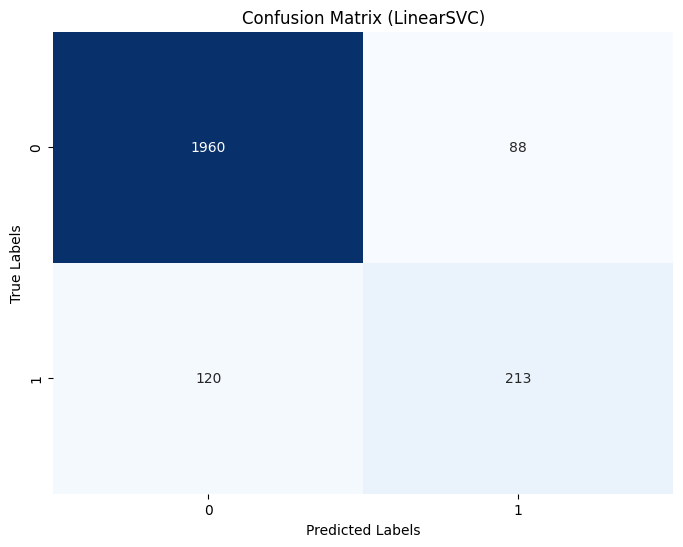

Cross-validation scores: [0.94397759 0.92016807 0.93697479 0.93137255 0.92997199]
Mean cross-validation score: 0.9324929971988796


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the LinearSVC model
linear_svc = LinearSVC(max_iter=10000)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(linear_svc, X_train_enc, y_train, cv=5, scoring='accuracy')

# Fit the model on the entire training data
linear_svc.fit(X_train_enc, y_train)

# Make predictions on the test set
linear_svc_predictions = linear_svc.predict(X_test_enc)

# Evaluate the model
accuracy_linear_svc = accuracy_score(y_test, linear_svc_predictions)
precision_linear_svc = precision_score(y_test, linear_svc_predictions, average='weighted')
recall_linear_svc = recall_score(y_test, linear_svc_predictions, average='weighted')
f1_linear_svc = f1_score(y_test, linear_svc_predictions, average='weighted')

# Display evaluation metrics
print(f"Accuracy (LinearSVC): {accuracy_linear_svc:.4f}")
print(f"Precision (LinearSVC): {precision_linear_svc:.4f}")
print(f"Recall (LinearSVC): {recall_linear_svc:.4f}")
print(f"F1 Score (LinearSVC): {f1_linear_svc:.4f}")

# Plot confusion matrix for LinearSVC
cm_linear_svc = confusion_matrix(y_test, linear_svc_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (LinearSVC)')
plt.show()

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean()}")


Accuracy (SVC): 0.8971
Precision (SVC): 0.8960
Recall (SVC): 0.8971
F1 Score (SVC): 0.8745


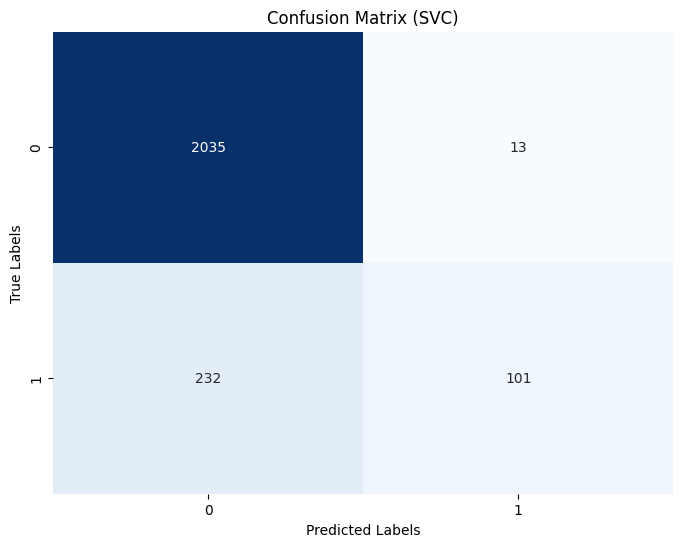

Cross-validation scores: [0.91 0.92 0.89 0.9  0.9 ]
Mean cross-validation score: 0.9040000000000001


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

# Shuffle and reduce dataset size for faster cross-validation
X_train_enc, y_train = shuffle(X_train_enc, y_train)
X_train_small = X_train_enc[:1000]  # Considering only a subset of data for cross-validation
y_train_small = y_train[:1000]  # Corresponding labels

# Create the SVC model
svc = SVC()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(svc, X_train_small, y_train_small, cv=5, scoring='accuracy')

# Fit the model on the entire reduced training data
svc.fit(X_train_small, y_train_small)

# Make predictions on the test set
svc_predictions = svc.predict(X_test_enc)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, svc_predictions)
precision_svc = precision_score(y_test, svc_predictions, average='weighted')
recall_svc = recall_score(y_test, svc_predictions, average='weighted')
f1_svc = f1_score(y_test, svc_predictions, average='weighted')

# Display evaluation metrics
print(f"Accuracy (SVC): {accuracy_svc:.4f}")
print(f"Precision (SVC): {precision_svc:.4f}")
print(f"Recall (SVC): {recall_svc:.4f}")
print(f"F1 Score (SVC): {f1_svc:.4f}")

# Plot confusion matrix for SVC
cm_svc = confusion_matrix(y_test, svc_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SVC)')
plt.show()

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean()}")


Accuracy (GaussianNB): 0.8471
Precision (GaussianNB): 0.8914
Recall (GaussianNB): 0.8471
F1 Score (GaussianNB): 0.8616


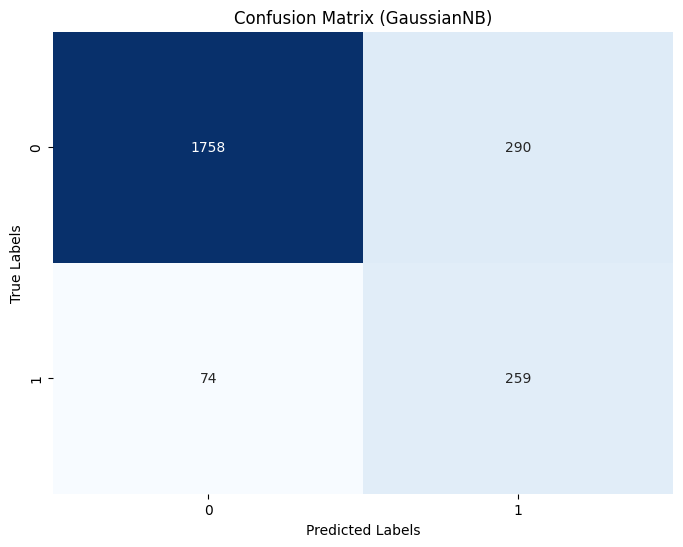

Cross-validation scores: [0.85014006 0.91736695 0.8487395  0.88795518 0.8627451 ]
Mean cross-validation score: 0.873389355742297


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the Gaussian Naive Bayes model
gnb = GaussianNB()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(gnb, X_train_enc, y_train, cv=5, scoring='accuracy')

# Fit the model on the entire training data
gnb.fit(X_train_enc, y_train)

# Make predictions on the test set
gnb_predictions = gnb.predict(X_test_enc)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, gnb_predictions)
precision_gnb = precision_score(y_test, gnb_predictions, average='weighted')
recall_gnb = recall_score(y_test, gnb_predictions, average='weighted')
f1_gnb = f1_score(y_test, gnb_predictions, average='weighted')

# Display evaluation metrics
print(f"Accuracy (GaussianNB): {accuracy_gnb:.4f}")
print(f"Precision (GaussianNB): {precision_gnb:.4f}")
print(f"Recall (GaussianNB): {recall_gnb:.4f}")
print(f"F1 Score (GaussianNB): {f1_gnb:.4f}")

# Plot confusion matrix for GaussianNB
cm_gnb = confusion_matrix(y_test, gnb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (GaussianNB)')
plt.show()

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean()}")


Accuracy (BernoulliNB): 0.7320
Precision (BernoulliNB): 0.8730
Recall (BernoulliNB): 0.7320
F1 Score (BernoulliNB): 0.7714


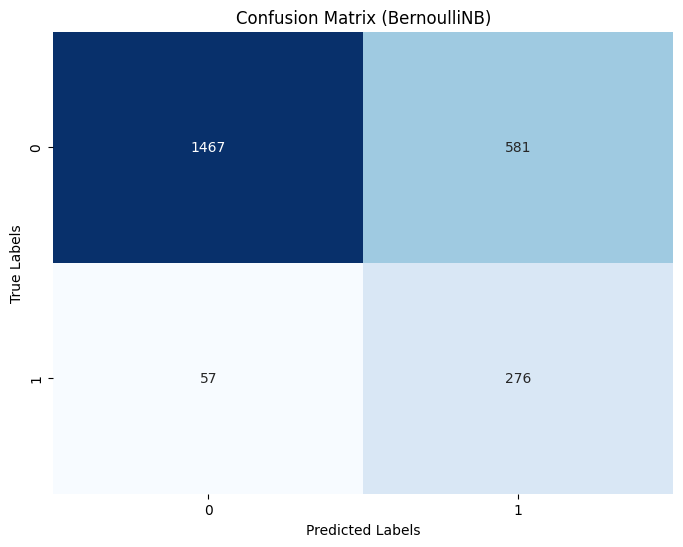

Cross-validation scores: [0.73669468 0.73389356 0.72969188 0.76330532 0.74089636]
Mean cross-validation score: 0.7408963585434174


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the Bernoulli Naive Bayes model
bnb = BernoulliNB()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(bnb, X_train_enc, y_train, cv=5, scoring='accuracy')

# Fit the model on the entire training data
bnb.fit(X_train_enc, y_train)

# Make predictions on the test set
bnb_predictions = bnb.predict(X_test_enc)

# Evaluate the model
accuracy_bnb = accuracy_score(y_test, bnb_predictions)
precision_bnb = precision_score(y_test, bnb_predictions, average='weighted')
recall_bnb = recall_score(y_test, bnb_predictions, average='weighted')
f1_bnb = f1_score(y_test, bnb_predictions, average='weighted')

# Display evaluation metrics
print(f"Accuracy (BernoulliNB): {accuracy_bnb:.4f}")
print(f"Precision (BernoulliNB): {precision_bnb:.4f}")
print(f"Recall (BernoulliNB): {recall_bnb:.4f}")
print(f"F1 Score (BernoulliNB): {f1_bnb:.4f}")

# Plot confusion matrix for BernoulliNB
cm_bnb = confusion_matrix(y_test, bnb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (BernoulliNB)')
plt.show()

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean()}")


Accuracy (SGD Classifier): 0.9009
Precision (SGD Classifier): 0.9118
Recall (SGD Classifier): 0.9009
F1 Score (SGD Classifier): 0.9050


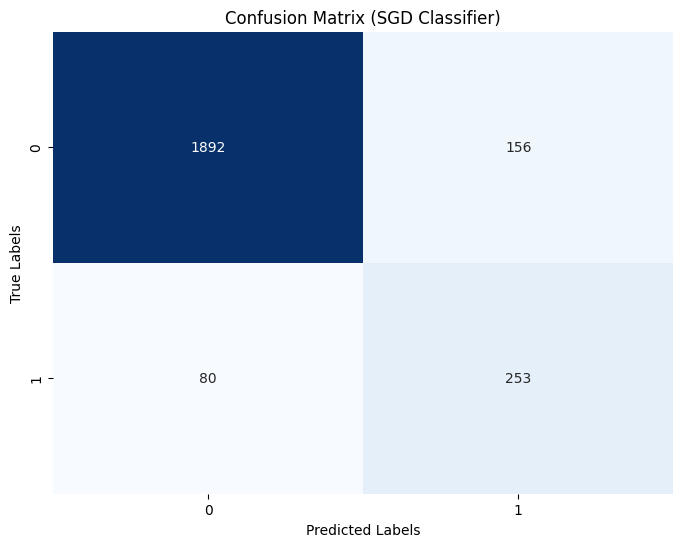

Cross-validation scores: [0.92016807 0.94537815 0.91176471 0.92577031 0.93837535]
Mean cross-validation score: 0.9282913165266107


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the SGD Classifier model
sgd = SGDClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(sgd, X_train_enc, y_train, cv=5, scoring='accuracy')

# Fit the model on the entire training data
sgd.fit(X_train_enc, y_train)

# Make predictions on the test set
sgd_predictions = sgd.predict(X_test_enc)

# Evaluate the model
accuracy_sgd = accuracy_score(y_test, sgd_predictions)
precision_sgd = precision_score(y_test, sgd_predictions, average='weighted')
recall_sgd = recall_score(y_test, sgd_predictions, average='weighted')
f1_sgd = f1_score(y_test, sgd_predictions, average='weighted')

# Display evaluation metrics
print(f"Accuracy (SGD Classifier): {accuracy_sgd:.4f}")
print(f"Precision (SGD Classifier): {precision_sgd:.4f}")
print(f"Recall (SGD Classifier): {recall_sgd:.4f}")
print(f"F1 Score (SGD Classifier): {f1_sgd:.4f}")

# Plot confusion matrix for SGD Classifier
cm_sgd = confusion_matrix(y_test, sgd_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sgd, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SGD Classifier)')
plt.show()

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean()}")


Accuracy (RandomForestClassifier): 0.9605
Precision (RandomForestClassifier): 0.9597
Recall (RandomForestClassifier): 0.9605
F1 Score (RandomForestClassifier): 0.9590


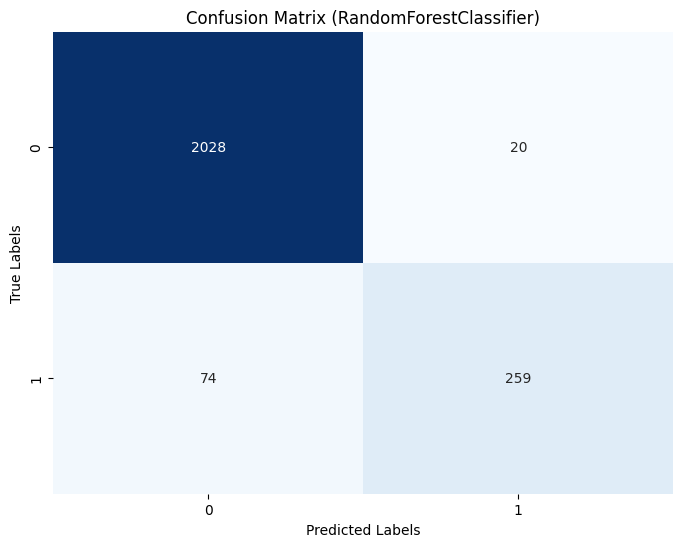

Cross-validation scores: [0.97478992 0.96778711 0.97338936 0.96638655 0.97759104]
Mean cross-validation score: 0.9719887955182072


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the RandomForestClassifier model
random_forest = RandomForestClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(random_forest, X_train_enc, y_train, cv=5, scoring='accuracy')

# Fit the model on the entire training data
random_forest.fit(X_train_enc, y_train)

# Make predictions on the test set
rf_predictions = random_forest.predict(X_test_enc)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, rf_predictions)
precision_rf = precision_score(y_test, rf_predictions, average='weighted')
recall_rf = recall_score(y_test, rf_predictions, average='weighted')
f1_rf = f1_score(y_test, rf_predictions, average='weighted')

# Display evaluation metrics
print(f"Accuracy (RandomForestClassifier): {accuracy_rf:.4f}")
print(f"Precision (RandomForestClassifier): {precision_rf:.4f}")
print(f"Recall (RandomForestClassifier): {recall_rf:.4f}")
print(f"F1 Score (RandomForestClassifier): {f1_rf:.4f}")

# Plot confusion matrix for RandomForestClassifier
cm_rf = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (RandomForestClassifier)')
plt.show()

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean()}")


Accuracy (ExtraTreesClassifier): 0.9614
Precision (ExtraTreesClassifier): 0.9604
Recall (ExtraTreesClassifier): 0.9614
F1 Score (ExtraTreesClassifier): 0.9604


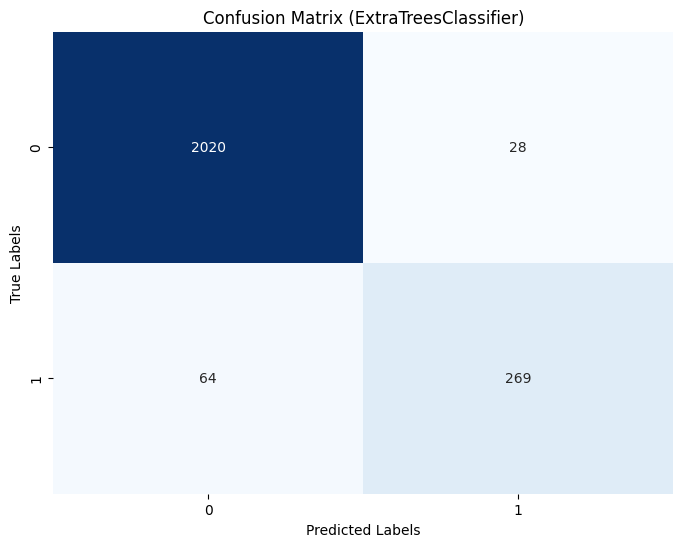

Cross-validation scores: [0.97619048 0.96778711 0.97759104 0.97478992 0.98179272]
Mean cross-validation score: 0.9756302521008402


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the ExtraTreesClassifier model
extra_trees = ExtraTreesClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(extra_trees, X_train_enc, y_train, cv=5, scoring='accuracy')

# Fit the model on the entire training data
extra_trees.fit(X_train_enc, y_train)

# Make predictions on the test set
et_predictions = extra_trees.predict(X_test_enc)

# Evaluate the model
accuracy_et = accuracy_score(y_test, et_predictions)
precision_et = precision_score(y_test, et_predictions, average='weighted')
recall_et = recall_score(y_test, et_predictions, average='weighted')
f1_et = f1_score(y_test, et_predictions, average='weighted')

# Display evaluation metrics
print(f"Accuracy (ExtraTreesClassifier): {accuracy_et:.4f}")
print(f"Precision (ExtraTreesClassifier): {precision_et:.4f}")
print(f"Recall (ExtraTreesClassifier): {recall_et:.4f}")
print(f"F1 Score (ExtraTreesClassifier): {f1_et:.4f}")

# Plot confusion matrix for ExtraTreesClassifier
cm_et = confusion_matrix(y_test, et_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_et, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (ExtraTreesClassifier)')
plt.show()

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean()}")


Accuracy (DecisionTreeClassifier): 0.9374
Precision (DecisionTreeClassifier): 0.9363
Recall (DecisionTreeClassifier): 0.9374
F1 Score (DecisionTreeClassifier): 0.9368


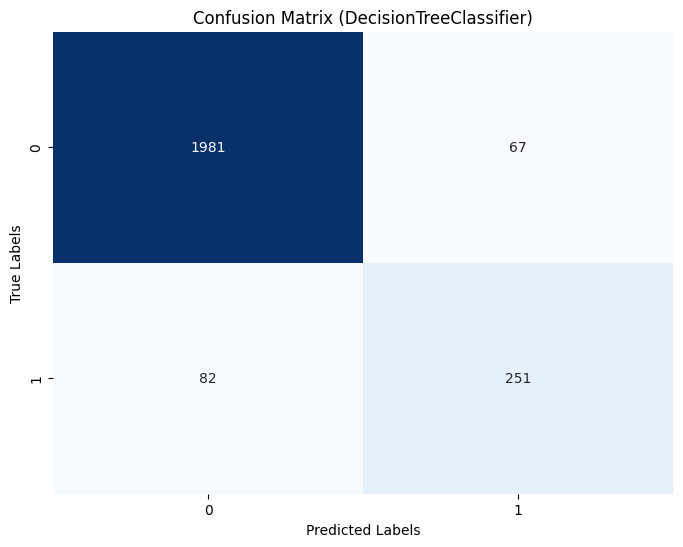

Cross-validation scores: [0.96078431 0.95378151 0.95238095 0.94257703 0.94397759]
Mean cross-validation score: 0.9507002801120448


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(decision_tree, X_train_enc, y_train, cv=5, scoring='accuracy')

# Fit the model on the entire training data
decision_tree.fit(X_train_enc, y_train)

# Make predictions on the test set
dt_predictions = decision_tree.predict(X_test_enc)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, dt_predictions)
precision_dt = precision_score(y_test, dt_predictions, average='weighted')
recall_dt = recall_score(y_test, dt_predictions, average='weighted')
f1_dt = f1_score(y_test, dt_predictions, average='weighted')

# Display evaluation metrics
print(f"Accuracy (DecisionTreeClassifier): {accuracy_dt:.4f}")
print(f"Precision (DecisionTreeClassifier): {precision_dt:.4f}")
print(f"Recall (DecisionTreeClassifier): {recall_dt:.4f}")
print(f"F1 Score (DecisionTreeClassifier): {f1_dt:.4f}")

# Plot confusion matrix for DecisionTreeClassifier
cm_dt = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (DecisionTreeClassifier)')
plt.show()

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean()}")


Accuracy (NearestCentroid): 0.8614
Precision (NearestCentroid): 0.8576
Recall (NearestCentroid): 0.8614
F1 Score (NearestCentroid): 0.8594


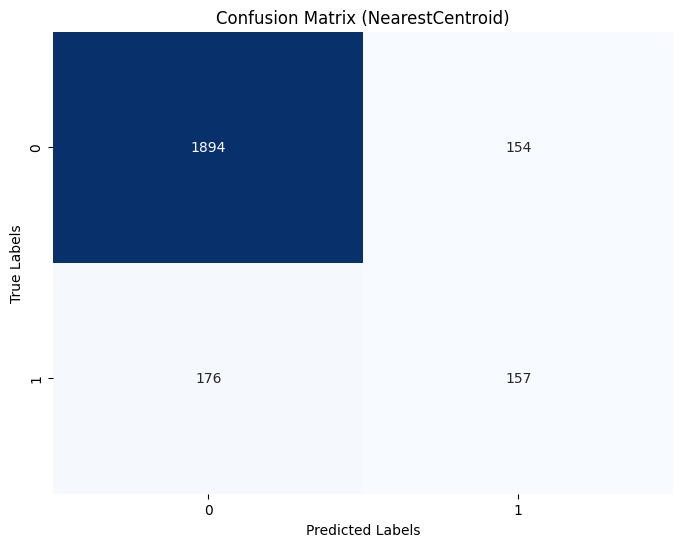

Cross-validation scores: [0.86834734 0.85994398 0.84733894 0.88655462 0.86554622]
Mean cross-validation score: 0.8655462184873951


In [ ]:
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the NearestCentroid model
nearest_centroid = NearestCentroid()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(nearest_centroid, X_train_enc, y_train, cv=5, scoring='accuracy')

# Fit the model on the entire training data
nearest_centroid.fit(X_train_enc, y_train)

# Make predictions on the test set
nc_predictions = nearest_centroid.predict(X_test_enc)

# Evaluate the model
accuracy_nc = accuracy_score(y_test, nc_predictions)
precision_nc = precision_score(y_test, nc_predictions, average='weighted')
recall_nc = recall_score(y_test, nc_predictions, average='weighted')
f1_nc = f1_score(y_test, nc_predictions, average='weighted')

# Display evaluation metrics
print(f"Accuracy (NearestCentroid): {accuracy_nc:.4f}")
print(f"Precision (NearestCentroid): {precision_nc:.4f}")
print(f"Recall (NearestCentroid): {recall_nc:.4f}")
print(f"F1 Score (NearestCentroid): {f1_nc:.4f}")

# Plot confusion matrix for NearestCentroid
cm_nc = confusion_matrix(y_test, nc_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (NearestCentroid)')
plt.show()

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean()}")


Accuracy (LinearDiscriminantAnalysis): 0.9055
Precision (LinearDiscriminantAnalysis): 0.8971
Recall (LinearDiscriminantAnalysis): 0.9055
F1 Score (LinearDiscriminantAnalysis): 0.8964


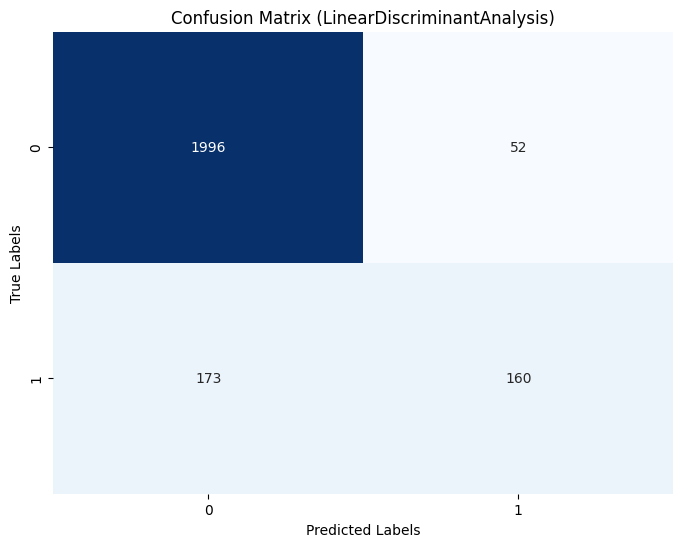

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create the LinearDiscriminantAnalysis model
lda = LinearDiscriminantAnalysis()

# Fit the model on the training data
lda.fit(X_train_enc, y_train)

# Make predictions
lda_predictions = lda.predict(X_test_enc)

# Calculate accuracy
accuracy_lda = accuracy_score(y_test, lda_predictions)

# Calculate precision
precision_lda = precision_score(y_test, lda_predictions, average='weighted')

# Calculate recall
recall_lda = recall_score(y_test, lda_predictions, average='weighted')

# Calculate F1 score
f1_lda = f1_score(y_test, lda_predictions, average='weighted')

print(f"Accuracy (LinearDiscriminantAnalysis): {accuracy_lda:.4f}")
print(f"Precision (LinearDiscriminantAnalysis): {precision_lda:.4f}")
print(f"Recall (LinearDiscriminantAnalysis): {recall_lda:.4f}")
print(f"F1 Score (LinearDiscriminantAnalysis): {f1_lda:.4f}")

# Plot confusion matrix for LinearDiscriminantAnalysis
cm_lda = confusion_matrix(y_test, lda_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (LinearDiscriminantAnalysis)')
plt.show()


In [ ]:
# Convert DataFrame to numpy array
X = X.values

# Reshape X for LSTM input
X = X.astype(np.float32)  # Already a numerical array
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

# Load your data
# (Assuming the data loading and preprocessing code remains the same)

# Reshape X for LSTM input
X = X.astype(np.float32)  # Already a numerical array
X = X.reshape(X.shape[0], X.shape[1], 1)

# Initialize evaluation metrics lists
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Define your bidirectional LSTM model for each fold
    model = Sequential()
    model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(X_train_fold.shape[1], X_train_fold.shape[2])))
    model.add(Bidirectional(LSTM(units=32)))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model on this fold
    history = model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_split=0.1, verbose=0)

    # Evaluate the model on the test set for this fold
    predicted_probs = model.predict(X_test_fold)
    predicted_labels = (predicted_probs > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test_fold, predicted_labels)
    precision = precision_score(y_test_fold, predicted_labels)
    recall = recall_score(y_test_fold, predicted_labels)
    f1 = f1_score(y_test_fold, predicted_labels)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate mean evaluation metrics over all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy}, Mean Precision: {mean_precision}, Mean Recall: {mean_recall}, Mean F1 Score: {mean_f1}")


38/38 [==============================] - 4s 68ms/step
Mean Accuracy: 0.9060641082629525, Mean Precision: 0.8093725451969215, Mean Recall: 0.3361081305682244, Mean F1 Score: 0.4672226544845114


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load your data
data = pd.read_csv('/content/drive/MyDrive/ADFA_LD_BINARY.csv')  # Update the file path

# Assuming your features are in columns other than the last one
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Process the columns if needed (as shown earlier)

# Convert features to a numpy array and reshape for LSTM input
X = X.values.astype(np.float32)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define evaluation metrics lists
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Define the number of folds for cross-validation
num_folds = 5
skf = KFold(n_splits=num_folds, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Define your LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=32))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)

    # Evaluate the model on the test set for this fold
    predicted_probs = model.predict(X_test)
    predicted_labels = (predicted_probs > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, predicted_labels)
    precision = precision_score(y_test, predicted_labels)
    recall = recall_score(y_test, predicted_labels)
    f1 = f1_score(y_test, predicted_labels)

    # Append metrics to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate mean evaluation metrics over all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy}, Mean Precision: {mean_precision}, Mean Recall: {mean_recall}, Mean F1 Score: {mean_f1}")


38/38 [==============================] - 3s 49ms/step
Mean Accuracy: 0.8865707088880892, Mean Precision: 0.608621053743005, Mean Recall: 0.17366306062972278, Mean F1 Score: 0.24701165493148275


In [ ]:
print(X_train.shape)



(4761, 274, 1)


In [ ]:
num_classes = len(np.unique(y_train))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming your features are in columns other than the last one
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# ... (previous code remains the same up to the reshaping step)

# Convert features to a numpy array and reshape for LSTM input
X = X.values.astype(np.float32)  # Convert to NumPy array
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM input

# Define evaluation metrics lists
accuracies = []
precisions = []
recalls = []
f1_scores = []

# ... (continue with the rest of the cross-validation code)


# Define evaluation metrics lists
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Define your Vanilla LSTM model
    model = Sequential()
    model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)

    # Evaluate the model on the test set for this fold
    predicted_probs = model.predict(X_test)
    predicted_labels = (predicted_probs > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, predicted_labels)
    precision = precision_score(y_test, predicted_labels)
    recall = recall_score(y_test, predicted_labels)
    f1 = f1_score(y_test, predicted_labels)

    # Append metrics to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate mean evaluation metrics over all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy}, Mean Precision: {mean_precision}, Mean Recall: {mean_recall}, Mean F1 Score: {mean_f1}")


38/38 [==============================] - 1s 22ms/step
Mean Accuracy: 0.8901049185417239, Mean Precision: 0.7286443661971831, Mean Recall: 0.23852120709539823, Mean F1 Score: 0.33831690317597723


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming your data is preprocessed and X, y are defined similarly as before

# Define your GRU model
model = Sequential()
model.add(GRU(units=64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(GRU(units=32))  # Adding the second GRU layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Initialize evaluation metrics lists
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[test_index]
    y_train_fold, y_val_fold = y[train_index], y[test_index]

    # Train the model on this fold
    model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Evaluate on the test set for this fold
    predicted_probs = model.predict(X_val_fold)
    predicted_labels = (predicted_probs > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val_fold, predicted_labels)
    precision = precision_score(y_val_fold, predicted_labels)
    recall = recall_score(y_val_fold, predicted_labels)
    f1 = f1_score(y_val_fold, predicted_labels)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate mean evaluation metrics over all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy}, Mean Precision: {mean_precision}, Mean Recall: {mean_recall}, Mean F1 Score: {mean_f1}")


38/38 [==============================] - 1s 31ms/step
Mean Accuracy: 0.9250582449604527, Mean Precision: 0.7457154904779106, Mean Recall: 0.6051353517614961, Mean F1 Score: 0.6624024837516859


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming your preprocessed data is stored in X and y

# Initialize evaluation metrics lists
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[test_index]
    y_train_fold, y_val_fold = y[train_index], y[test_index]

    # Define your Peephole LSTM model
    model = Sequential()
    model.add(LSTM(units=64, input_shape=(X_train_fold.shape[1], X_train_fold.shape[2]), unit_forget_bias=True))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model on this fold
    history = model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Evaluate on the test set for this fold
    predicted_probs = model.predict(X_val_fold)
    predicted_labels = (predicted_probs > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val_fold, predicted_labels)
    precision = precision_score(y_val_fold, predicted_labels)
    recall = recall_score(y_val_fold, predicted_labels)
    f1 = f1_score(y_val_fold, predicted_labels)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate mean evaluation metrics over all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy}, Mean Precision: {mean_precision}, Mean Recall: {mean_recall}, Mean F1 Score: {mean_f1}")


38/38 [==============================] - 1s 22ms/step
Mean Accuracy: 0.8912788490711145, Mean Precision: 0.7279783386566611, Mean Recall: 0.2290125280630395, Mean F1 Score: 0.3324715286337538


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras.models import Model
from keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Input, concatenate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X and y are already defined

# Initialize evaluation metrics lists
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[test_index]
    y_train_fold, y_val_fold = y[train_index], y[test_index]

    # Define LSTM Model
    input_layer = Input(shape=(X_train_fold.shape[1], X_train_fold.shape[2]))
    lstm_layer = LSTM(units=64, return_sequences=True)(input_layer)
    lstm_flatten = Flatten()(lstm_layer)

    # Define CNN Model
    conv1d_layer = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
    maxpooling_layer = MaxPooling1D(pool_size=2)(conv1d_layer)
    cnn_flatten = Flatten()(maxpooling_layer)

    # Merge LSTM and CNN branches
    merged = concatenate([lstm_flatten, cnn_flatten])

    # Fully connected layers
    dense_layer = Dense(units=64, activation='relu')(merged)
    output_layer = Dense(units=1, activation='sigmoid')(dense_layer)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model on this fold
    history = model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Evaluate on the test set for this fold
    predicted_probs = model.predict(X_val_fold)
    predicted_labels = (predicted_probs > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val_fold, predicted_labels)
    precision = precision_score(y_val_fold, predicted_labels)
    recall = recall_score(y_val_fold, predicted_labels)
    f1 = f1_score(y_val_fold, predicted_labels)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate mean evaluation metrics over all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy}, Mean Precision: {mean_precision}, Mean Recall: {mean_recall}, Mean F1 Score: {mean_f1}")


38/38 [==============================] - 2s 32ms/step
Mean Accuracy: 0.9642077485906201, Mean Precision: 0.8787893260882018, Mean Recall: 0.828126896271305, Mean F1 Score: 0.8522137169890842


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras.models import Model
from keras.layers import LSTM, Dense, Input, dot, Activation, concatenate, Lambda
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras import backend as K

# Assuming X and y are already defined

# Initialize evaluation metrics lists
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)



# Attention mechanism
def attention_layer(inputs):
    hidden_states = inputs
    hidden_size = int(hidden_states.shape[2])
    score_first_part = Dense(hidden_size, use_bias=False)(hidden_states)
    h_t = Lambda(lambda x: x[:, -1, :], output_shape=(hidden_size,))(hidden_states)
    score = dot([score_first_part, h_t], [2, 1])
    attention_weights = Activation('softmax')(score)
    context_vector = dot([hidden_states, attention_weights], [1, 1])
    return context_vector


# Inside your loop
for train_index, test_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[test_index]
    y_train_fold, y_val_fold = y[train_index], y[test_index]

    input_layer = Input(shape=(X_train_fold.shape[1], X_train_fold.shape[2]))
    lstm_layer = LSTM(units=64, return_sequences=True)(input_layer)
    attention = attention_layer(lstm_layer)  # Ensure this outputs a tensor

    # Debugging: print the shape of attention to ensure it's not None
    print("Attention shape:", attention.shape)

    output_layer = Dense(units=1, activation='sigmoid')(attention)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Evaluate on the test set for this fold
    predicted_probs = model.predict(X_val_fold)
    predicted_labels = (predicted_probs > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val_fold, predicted_labels)
    precision = precision_score(y_val_fold, predicted_labels)
    recall = recall_score(y_val_fold, predicted_labels)
    f1 = f1_score(y_val_fold, predicted_labels)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate mean evaluation metrics over all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy}, Mean Precision: {mean_precision}, Mean Recall: {mean_recall}, Mean F1 Score: {mean_f1}")


Attention shape: (None, 64)
38/38 [==============================] - 1s 28ms/step
Attention shape: (None, 64)
38/38 [==============================] - 1s 26ms/step
Attention shape: (None, 64)
38/38 [==============================] - 1s 25ms/step
Attention shape: (None, 64)
38/38 [==============================] - 1s 24ms/step
Attention shape: (None, 64)
38/38 [==============================] - 1s 24ms/step
Mean Accuracy: 0.9100978628227109, Mean Precision: 0.7431398601398602, Mean Recall: 0.4651746138660894, Mean F1 Score: 0.5657770348282682


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y_train' is your target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.layers import Input, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Concatenate
from keras.models import Model

# Assuming X_train, y_train_encoded, X_test, y_test_encoded are defined

# Reshape X_train for LSTM-CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Initialize evaluation metrics lists
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

# Inside your loop for cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[test_index]

    # Model architecture
    input_layer = Input(shape=(X_train_fold.shape[1], 1))
    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
    pool1 = MaxPooling1D(pool_size=2)(conv1)
    lstm1 = LSTM(units=64, return_sequences=True)(pool1)
    lstm2 = LSTM(units=64, return_sequences=True)(lstm1)
    conv1_padded = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    skip_connection = Concatenate(axis=-2)([lstm2, conv1_padded])
    flat = Flatten()(skip_connection)
    output_layer = Dense(units=num_classes, activation='softmax')(flat)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Evaluate the model on the validation set for this fold
    predicted_probs = model.predict(X_val_fold)
    predicted_labels = predicted_probs.argmax(axis=1)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val_fold, predicted_labels)
    precision = precision_score(y_val_fold, predicted_labels, average='weighted')
    recall = recall_score(y_val_fold, predicted_labels, average='weighted')
    f1 = f1_score(y_val_fold, predicted_labels, average='weighted')

    # Append the metrics to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate mean evaluation metrics over all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy}, Mean Precision: {mean_precision}, Mean Recall: {mean_recall}, Mean F1 Score: {mean_f1}")


30/30 [==============================] - 1s 28ms/step
Mean Accuracy: 0.9592516334970504, Mean Precision: 0.9584592089458781, Mean Recall: 0.9592516334970504, Mean F1 Score: 0.9575217220438417
